# Home Features Analysis

**Author:** Elimelech Berlin  
**Date:** March 2023
***

### Overview
This report analyzes available data to identify home features that have a correlation with home sale prices. Included in this data is both information about fixed aspects of houses such as location, year built etc., & features that can be modified e.g. living space, utilities. As this report aims to provide insight to professionals looking to modify properties to maximize home resale value, it focuses on features included in the latter category.  
From this report, several takeaways emerge:
***

### Business Problem
Investors looking to turn a profit from flipping houses are presented with the following dilemma: With a finite amount of funds to invest per property, how should they spend their money to maximize their return? What home features are associated with an increase in home value?  
In this report I explore a given dataset to pinpoint what sort of property renovations/improvements investors would be advised to undertake in their effort to boost a given home's resail value.
***

### Data
The data examined in this report describes properties located in King County, Washington and comes from the King County Assessor Data Download available from the [King County Department of Assesments webpage](https://info.kingcounty.gov/assessor/DataDownload/default.aspx). (Some of the properties are located outside of the county proper).  
This dataset contains information about a variety of home/property features of about 30,000 properties. Features described include general details (location, view from the home etc.) as well as details about the actual structure and layout (square-footage, utilities etc.) of the properties.  
In creating this report the following two files were used:
* [kc house data.csv](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/kc_house_data.csv) contains the dataset 
* [column names.md](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/column_names.md) contains descriptive information about each column in the dataset
***

### Data Preparation
In this section we will prepare the dataset for analysis. This includes previewing the data, dropping irrelevant columns, and removing rows with values that might needlesly corrupt information that emerges from this report.

>Before we do anything, let's get all of the necessary imports taken care of:

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

Now, to get started, import & have a look at the data:

In [2]:
# load dataset from file & preview it
kc_house_data = pd.read_csv('data/kc_house_data.csv')
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


This dataset contains a lot of information (25 columns). To make things slightly more streamlined, let's drop some of the columns that we will not be using:

In [3]:
# create list of columns to ignore (drop) in this report
col_to_ignore = ['date', 'view', 'sqft_above', 'address', 'lat', 'long']

# drop those columns
kc_house_data.drop(col_to_ignore, axis=1, inplace=True)

Now, remove rows with missing values:

In [4]:
# drop rows with null values for ease of use
kc_house_data.dropna(inplace=True)

>Although it mean seem like a good idea to consider homes with `'price'` above the 75th percentile to be outliers & exclude them from this analysis, it is not necasserily so, as such homes may fit into the general patterns revealed by this report as higher priced homes may likely posses characteristics which justify their high values. (e.g. an expensive home may have a high square-footage, high grade, be located on a waterfront etc.)

To get familiar with everything going here, let's view some descriptive information about the properties described in this dataset:

In [5]:
# get a sense of the distributios of the features
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,476.617117,330.475308,217.451264,1975.162299,90.792767
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,579.805355,285.725020,245.301991,32.052930,416.197627
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,1900.000000,0.000000
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,40.000000,1953.000000,0.000000
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,0.000000,400.000000,150.000000,1977.000000,0.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,940.000000,510.000000,320.000000,2003.000000,0.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000


>With the dataset loaded, neatened & cleared of missing values, we are ready to begin the analysis of all this information.
***

### Data Analysis

As this report aims to identify ways in which properties can be renovated or improved to maximize resale value, we will examine the data using the following variables:
-  `'price'` will be the dependent/target variable
- all other features will be independent/predictor variables

First, get a sense of how each numerical variable is independently correlated with the target variable:

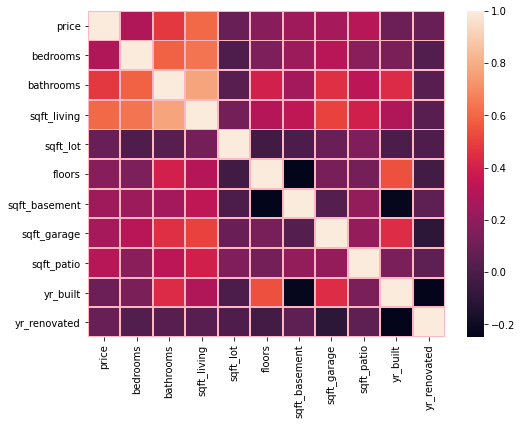

In [6]:
# create figure & axes, set figure size to be large enough to be useful
fig, ax =plt.subplots(figsize=(8, 6))
# plot heatmap of numerical values
sns.heatmap(kc_house_data.drop('id', axis=1).select_dtypes(exclude = 'object').corr(), linewidths= .9, linecolor='lightpink');

Two important observations emerge from the above image:
* The sqft_living feature is the most correlated with the target feature of price.
* Sqft_living & bathrooms features are highly correlated with each other & should not both be included in a regression model to avoid issues of multicollinearity. (We can use one of them, just not both.)

#### Regression Modeling
Let's begin our investigation with the `'sqft_living'` feature.  
To get a sense of things, create a visualization of square-footage vs. price:

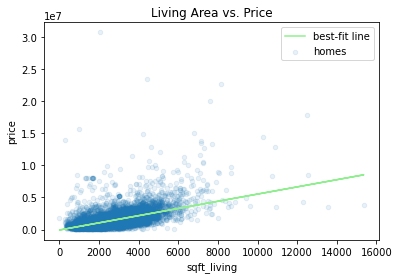

In [7]:
# plot sqft_living vs. price
kc_house_data.plot.scatter(x='sqft_living', y='price', alpha=.1, label='homes')
plt.title('Living Area vs. Price')

# add best-fit line to the plot
a, b = np.polyfit(kc_house_data['sqft_living'], kc_house_data['price'], 1)
plt.plot(kc_house_data['sqft_living'], a*kc_house_data['sqft_living']+b, color= 'lightgreen', label='best-fit line')
plt.legend();

Now, to truly understand the relationship between these two features let's build a linear regression model & view its results summary:

In [8]:
# set variables for the model
X_baseline = kc_house_data[['sqft_living']]
y = kc_house_data['price']

# create model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# view summary of the results
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:46:21   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Evaluation
The overall model is statistically significant with a p-value of (nearly) 0.
The R-squared value indicates that 37% of the variance in the data is explained by the sqft_living feature.  
>Before we explain what this says about the effect of `'sqft_living'` on `'price'`, let's improve the model to better understand the data.

#### Multiple Linear Regression Modeling
Let's add  several more predictor variables to try and maximize the adjusted R-squared value (i.e. better understand what features influence home price). Let's take a look at the grade feature of the homes in the dataset. (This feature describes the types of materials & quality of workmanship of homes.) We begin by plotting a bar graph of the average price of homes in each grade level to get a sense of the effect of grade on price.

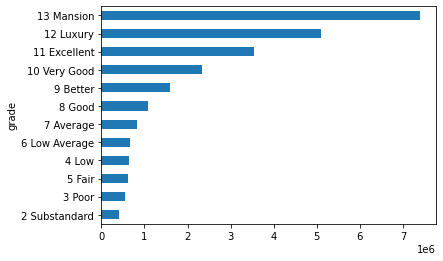

In [9]:
# plot average home price by grade
kc_house_data.groupby('grade').mean()['price'].sort_values(ascending = True).plot(kind='barh');

From the above plot it's apparent that there is a clear difference in average price between homes of different grades. The mean price of houses in each grade increases as the grade is raised. 
Now, let's add this feature to the linear regression model. To do so, this column's categorical values must first be transformed into numerical values via one-hot encoding. 
>The lowest grade, grade_2 Substandard, will be the reference category.  

In [10]:
# add new columns for one-hot encoding of the grade feature & drop lowest to be the reference category
kc_house_data = pd.get_dummies(kc_house_data, columns=['grade']).drop(['grade_2 Substandard'], axis=1)

Now, build a new model with the additional category & view its results summary:

In [11]:
# build new model and display its summary

# set predictor variables
X_2 = kc_house_data[['sqft_living', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 
                     'grade_6 Low Average','grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'grade_10 Very Good', 
                     'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']]

# create regression model
model_2 = sm.OLS(y, sm.add_constant(X_2))
results_2 = model_2.fit()
# display results summary
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     2148.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:46:22   Log-Likelihood:            -4.4612e+05
No. Observations:               30111   AIC:                         8.923e+05
Df Residuals:                   30098   BIC:                         8.924e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.632e+05   6.58e+05      0.248      0.804   -1.13e+06    1.45e+06
sqft_living           311.6109      5.783     53.884      0.000     300.276     322.946
grade_3 Poor         1.466e+05   6.94e+05      0.211      0.833   -1.21e+06    1.51e+06
grade_4 Low           2.75e+05   6.65e+05      0.413      0.679   -1.03e+06    1.58e+06
grade_5 Fair         1.721e+05   6.59e+05      0.261      0.794   -1.12e+06    1.46e+06
grade_6 Low Average  1.129e+05   6.58e+05      0.172      0.864   -1.18e+06     1.4e+06
grade_7 Average      1.185e+05   6.58e+05      0.180      0.857   -1.17e+06    1.41e+06
grade_8 Good         2.312e+05   6.58e+05      0.351      0.725   -1.06e+06    1.52e+06
grade_9 Better       5.294e+05   6.58e+05      0.804      0.421   -7.61e+05    1.82e+06
grade_10 Very Good   1.017e+06   6.59e+05      1.545      0.122   -2.73e+05    2.31e+06
grade_11 Excellent    1.94e+06   6.59e+05      2.943      0.003    6.48e+05    3.23e+06
grade_12 Luxury      3.127e+06   6.61e+05      4.727      0.000    1.83e+06    4.42e+06
grade_13 Mansion     4.699e+06   6.73e+05      6.982      0.000    3.38e+06    6.02e+06
==============================================================================
Omnibus:                    43091.497   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50217461.105
Skew:                           8.049   Prob(JB):                         0.00
Kurtosis:                     202.416   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Evaluation
The overall model is statistically significant with a p-value of (nearly) 0.
The adjusted R-squared value indicates that 46% of the variance in the price target is explained by the sqft_living and grade features. This is an increse of 9% over the previous model, this model better explains the data than the previous one.

>It's notable that according to the above model results, the amount each feature is higher than the reference category does not increase in the percise order of the grades. The order in which the values increase is 6, 7, 3, 5, 8, 4, 9, 10, 11, 12, 13. Reasons for this may include that the above model doesn't account for certain other factors (e.g. waterfront, nuisance, year built) that can effect home prices regardless of `'grade'`. 

#### Model Improvement
Let's continue to add features to the model and improve it by explaining more of the variance in the data. (Aim for a higher adjusted R-squared value.) Let's go all out & add any remaining features that might help better predict `'price'`.  
Some of the values are categorical and need to be modified via one-hot encoding.

>First we one-hot encode three features & create a new column for all but one possible value in each column (reference category).

| Column | Reference Category |
|----|----|
condition | condition_Poor
sewer_system | sewer_system_PRIVATE RESTRICTED
heat_source | heat_source_Electricity

In [12]:
# create columns for categorical features and drop a column for each
kc_house_data = pd.get_dummies(kc_house_data,
                               columns = ['condition',
                                          'sewer_system',
                                          'heat_source']).drop(['condition_Poor',
                                                                'sewer_system_PRIVATE RESTRICTED',
                                                                'heat_source_Electricity'], axis=1)

Build the model & view the results summary:

In [13]:
# build new model and display its summary

# set predictor variables
X_3 = kc_house_data[['sqft_living', 'sqft_garage', 'sqft_patio', 'sqft_basement', 'floors', 'yr_renovated', 'bedrooms',
                     'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average','grade_7 Average', 'grade_8 Good',  
                     'grade_9 Better', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 
                     'condition_Average', 'condition_Fair', 'condition_Good', 'condition_Very Good',
                     'sewer_system_PRIVATE', 'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED',
                     'heat_source_Electricity/Solar','heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
                     'heat_source_Oil/Solar', 'heat_source_Other']]

# create regression model
model_3 = sm.OLS(y, sm.add_constant(X_3))
results_3 = model_3.fit()
# display results summary
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     925.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:46:22   Log-Likelihood:            -4.4535e+05
No. Observations:               30111   AIC:                         8.908e+05
Df Residuals:                   30079   BIC:                         8.910e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.396e+05   7.06e+05      0.339      0.734   -1.14e+06    1.62e+06
sqft_living                      345.7677      7.963     43.422      0.000     330.160     361.375
sqft_garage                     -241.8110     16.571    -14.592      0.000    -274.291    -209.331
sqft_patio                       202.2779     17.158     11.789      0.000     168.648     235.908
sqft_basement                     58.5893      7.821      7.491      0.000      43.260      73.919
floors                         -5.577e+04   8761.648     -6.365      0.000   -7.29e+04   -3.86e+04
yr_renovated                     136.0410      9.082     14.978      0.000     118.239     153.843
bedrooms                       -5.879e+04   5211.309    -11.282      0.000    -6.9e+04   -4.86e+04
grade_3 Poor                   -2.491e+04   6.79e+05     -0.037      0.971   -1.36e+06    1.31e+06
grade_4 Low                     1.178e+05   6.54e+05      0.180      0.857   -1.16e+06     1.4e+06
grade_5 Fair                   -7884.8344   6.48e+05     -0.012      0.990   -1.28e+06    1.26e+06
grade_6 Low Average            -7.102e+04   6.48e+05     -0.110      0.913   -1.34e+06     1.2e+06
grade_7 Average                -1.504e+04   6.47e+05     -0.023      0.981   -1.28e+06    1.25e+06
grade_8 Good                    1.473e+05   6.48e+05      0.227      0.820   -1.12e+06    1.42e+06
grade_9 Better                  4.751e+05   6.48e+05      0.734      0.463   -7.94e+05    1.74e+06
grade_10 Very Good              9.732e+05   6.48e+05      1.502      0.133   -2.97e+05    2.24e+06
grade_11 Excellent              1.869e+06   6.49e+05      2.882      0.004    5.98e+05    3.14e+06
grade_12 Luxury                 2.994e+06   6.51e+05      4.602      0.000    1.72e+06    4.27e+06
grade_13 Mansion                4.536e+06   6.62e+05      6.852      0.000    3.24e+06    5.83e+06
condition_Average               6881.2392   8.57e+04      0.080      0.936   -1.61e+05    1.75e+05
condition_Fair                  3.906e+04   9.49e+04      0.412      0.681   -1.47e+05    2.25e+05
condition_Good                  8.202e+04   8.58e+04      0.956      0.339   -8.61e+04     2.5e+05
condition_Very Good             1.591e+05   8.62e+04      1.845      0.065   -9893.651    3.28e+05
sewer_system_PRIVATE            2.753e+04   2.93e+05      0.094      0.925   -5.47e+05    6.02e+05
sewer_system_PUBLIC             2.091e+05   2.93e+05      0.714      0.475   -3.65e+05    7.83e+05
sewer_system_PUBLIC RESTRICTED  7.152e+04   4.72e+05      0.151      0.880   -8.54e+05    9.97e+05
heat_source_Electricity/Solar  -8.099e+04    8.4e+04     -0.964      0.335   -2.46e+05    8.37e+04
heat_source_Gas                 1.326e+04   9850.252      1.347      0.178   -6042.746    3.26e+04
heat_source_Ga

### Model Evaluation
The adjusted R-squared value indicates that this model explains about 48% of the variance of the data. This is a 2% increase over the previous model's 46%. The p-value of this model is about 0 which means that it is, overall, statistically significant.  
  
>A closer examination of the results reveals the following problem: many of the p-values of the feature coefficients are above an alpha of 0.05. This means that the coefficients returned for those features may not be accurate and cannot be used to learn anything about those variables in relation to the target. Let's build a new model without those features:

### Rebuild the Linear Regression Model
To build a new model excluding the features we have found to have non-statistically significant coefficients, first create a Dataframe with all the features; then filter out those unwanted ones; then finally, use the remaining features to build a new model:

Create a list of features with low enough p-values, to use in linear regression modeling, from a Dataframe:

In [14]:
# load features with their p-values into a dataframe & drop the 'const' row (we will create a new one when building the new model)
pval_df = pd.DataFrame(results_3.pvalues).drop(index='const')

# reset index
pval_df.reset_index(inplace=True)

# rename columns
pval_df.rename(columns={'index':'feature', 0: 'p-value'}, inplace=True)

# remove features with p-values greater than 0.05
pval_df = pval_df[pval_df['p-value'] <= 0.05]
# reset index
pval_df.reset_index(drop=True, inplace=True)

# create a list of features
low_pv_ft = list(pval_df['feature'])

Build the linear regression model and view results summary:

In [15]:
# set independent features
X_4 = kc_house_data[low_pv_ft]

# create regression model
model_4 = sm.OLS(y, sm.add_constant(X_4))
                      
results_4 = model_4.fit()

# display results summary
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     2007.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:46:22   Log-Likelihood:            -4.4658e+05
No. Observations:               30111   AIC:                         8.932e+05
Df Residuals:                   30098   BIC:                         8.933e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.424e+05   1.77e+04     13.706      0.000    2.08e+05    2.77e+05
sqft_living             510.3910      7.184     71.044      0.000     496.310     524.472
sqft_garage            -169.0489     16.368    -10.328      0.000    -201.131    -136.967
sqft_patio              232.2210     17.348     13.386      0.000     198.218     266.224
sqft_basement            55.1329      7.935      6.948      0.000      39.580      70.686
floors                 2.927e+04   7914.746      3.698      0.000    1.38e+04    4.48e+04
yr_renovated            112.0700      9.381     11.947      0.000      93.683     130.457
bedrooms              -9.351e+04   5241.554    -17.841      0.000   -1.04e+05   -8.32e+04
grade_11 Excellent     1.238e+06   3.56e+04     34.747      0.000    1.17e+06    1.31e+06
grade_12 Luxury        2.163e+06   6.34e+04     34.117      0.000    2.04e+06    2.29e+06
grade_13 Mansion       3.295e+06    1.4e+05     23.532      0.000    3.02e+06    3.57e+06
heat_source_Gas/Solar  2.425e+05   6.95e+04      3.488      0.000    1.06e+05    3.79e+05
heat_source_Oil        2.354e+04   1.37e+04      1.719      0.086   -3299.164    5.04e+04
==============================================================================
Omnibus:                    41279.910   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         41636962.815
Skew:                           7.411   Prob(JB):                         0.00
Kurtosis:                     184.568   Cond. No.                     8.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation
The adjusted R-squared value indicates that this model explains about 44% of the variance of the data. This is a 4% decrease from the previous model's 48%. Although the adjusted R-value is lower, this version may still be an improvement as the data that it does explain is more accurate, and excludes the misleading coefficients.  
The p-value of this model is about 0 which means that it is, overall, statistically significant.

### Assumptions of Linear Regression
Before proceding with this model, we need to determine if it meets the assumptions of linear regression.   
- We know from the heatmap at the beginning of this report that only two features have a suspiciously high correlation: `'sqft_living'` & `'bathrooms'`; we deliberately left out bathrooms from the regression models to ensure __independence__ among the predictor features.
- To assess this model for __normal distribution of errors__ , __homoscedasticity__ & __linearity__ consider the following:

>Plot a histogram of the distribution of the residuals to view their distribution.  
Plot scatter plot of residuals to visually inspect their spread to check for linearty & homoscedasticity.

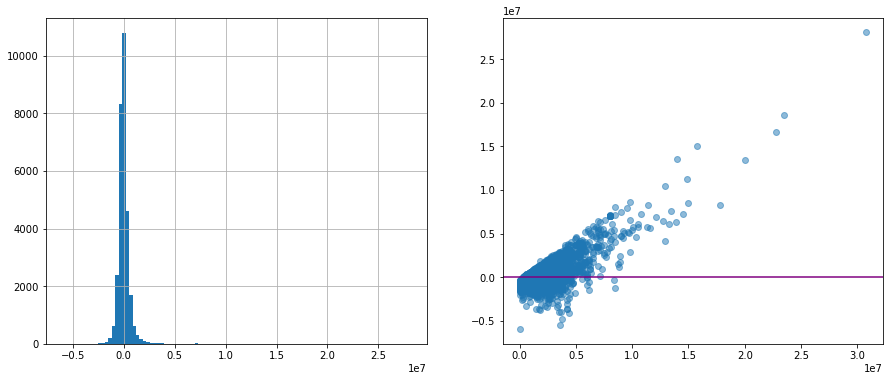

In [16]:
# create figure & axes
fig, axes = plt.subplots(figsize=(15, 6), ncols=2)

# plot histogram of distribution of residuals
results_4.resid.hist(bins = 100, ax = axes[0])

# plot scatterplot of residuals
plt.scatter(y = results_4.resid, x = kc_house_data['price'], alpha=.5)

# add horizontal line at 0 for ease of interpretation
plt.axhline(y = 0, c='purple');

#### Plot Interpetation
- From the very tall and narrow form, and the elongated right side tail of the histogram, it's apparent that the errors are not really normally distributed.  
- The variance of the errors seems to follow a clear pattern: it begins below zero (overpredicts price) at the low end of the spread of price and rises as price increases (under predicts price).  
> These plots indicate that the data, as is, isin't a great fit for linear regression because:
>- it's not truly linear 
>- the errors are not normally distributed
>- the errors fail to display homoscedasticity

#### Log Transformation
To at least partially reduce these issues let's build a modified model using the logged transformed version of the target variable:

In [17]:
# set dependent variable to logged transformed version of price
y_log = np.log(y)

# build model with transformed variable
model_5 = sm.OLS(y_log, sm.add_constant(X_4))
results_5 = model_5.fit()

# display results summary
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     1727.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:46:23   Log-Likelihood:                -18542.
No. Observations:               30111   AIC:                         3.711e+04
Df Residuals:                   30098   BIC:                         3.722e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.9464      0.012   1092.177      0.000      12.923      12.970
sqft_living               0.0004   4.82e-06     72.996      0.000       0.000       0.000
sqft_garage            -4.97e-05    1.1e-05     -4.530      0.000   -7.12e-05   -2.82e-05
sqft_patio                0.0001   1.16e-05     12.094      0.000       0.000       0.000
sqft_basement          6.591e-05   5.32e-06     12.390      0.000    5.55e-05    7.63e-05
floors                    0.0780      0.005     14.709      0.000       0.068       0.088
yr_renovated           6.494e-05   6.29e-06     10.326      0.000    5.26e-05    7.73e-05
bedrooms                 -0.0388      0.004    -11.029      0.000      -0.046      -0.032
grade_11 Excellent        0.2986      0.024     12.505      0.000       0.252       0.345
grade_12 Luxury           0.1677      0.042      3.947      0.000       0.084       0.251
grade_13 Mansion         -0.4560      0.094     -4.858      0.000      -0.640      -0.272
heat_source_Gas/Solar     0.1488      0.047      3.194      0.001       0.057       0.240
heat_source_Oil           0.0190      0.009      2.072      0.038       0.001       0.037
==============================================================================
Omnibus:                     6206.475   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53507.912
Skew:                          -0.751   Prob(JB):                         0.00
Kurtosis:                       9.356   Cond. No.                     8.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation
The adjusted R-squared value indicates that this model explains about 40% of the variance of the data, which is 4% less than the previous model (same predictor variables but unstransformed target). (It is a better model because the data better meets the assumptions for linear regression, do to the transformation of the target variable.) The p-value of this model is about 0 which means that it is, overall, statistically significant.

### Assumptions of Linear Regression
Again, before proceding, let's check if this model meets the linearity, normality, & homoscedasticty assumptions for linear regression (multicollinearity is unaffected by this change):

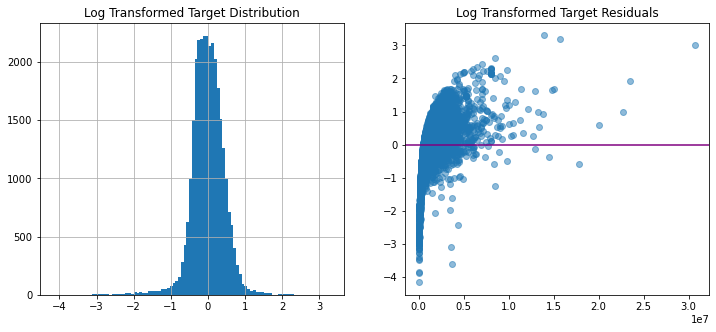

In [43]:
# plot a histogram of the residuals of the logged transformed target model
fig, axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

# plot histogram of distribution of residuals
results_5.resid.hist(bins = 100, ax = axes[0])
axes[0].set_title('Log Transformed Target Distribution')

# plot scatterplot of residuals
plt.scatter(y = results_5.resid, x = kc_house_data['price'], alpha=.5)
axes[1].set_title('Log Transformed Target Residuals')


plt.axhline(y = 0, c='purple');

#### Plot Interpetation
- The distribution of errors of the logged target model appears more normally distributed than the model with the untransformed variables. (It's not perfect, but seems close enough.)  
- The scatterplot of the errors is still uneven; this mean that the data in its current form is still not truly linear & also doesn't fulfill the requirement of homoscedasticity.

> Although the given data may not be a perfect fit for interpretation through linear regression modeling, we will proceed with this model to glean some insight into the business question.

In [19]:
pd.DataFrame(results_5.params)

,0
const,12.946387
sqft_living,0.000352
sqft_garage,-0.000050
sqft_patio,0.000141
sqft_basement,0.000066
floors,0.078040
yr_renovated,0.000065
bedrooms,-0.038751
grade_11 Excellent,0.298602
grade_12 Luxury,0.167733


In [42]:
results_5.params['const'] * 100

1294.6387114087142

### Model Interpretation
The coefficients of the model results provide insight into the effect of a number of different home features in the given market:
* the coefficient of the constant shows that a home with 0 square feet of living space, garage space, patio area, or basement area;
no floors or bedrooms; constructed with substandard materials & workmanship; was year renovated; in poor condition, & heated exclusively by an electrical heat system, would have a price of $1294
                                                                
* the coefficients of the predictor features indicate the following effect on home price:
 * an increase of 3/10 of a percent for each additional square-foot of __living space__
 * an decrease of .004 percent for each additional square-foot of __garage area__
 * an increase of 1/10 of a percent for each additional square-foot of __patio area__
 * an increase of .006 for each additional square-foot of __basement area__
 * an increase of 7.8% per each __floor__
 * an increase of .006% for every increase of 1 in year built 
 * a decrease of 3.8% for each __bedroom__
 * homes with an __excellent grade__ will typically be worth 30% more than similar homes with a substandard grade
 * homes with a __luxury grade__ will typically be worth 17% more than similar homes with a substandard grade
 * homes with a __mansion grade__ will typically be worth 46% less than similar homes with a substandard grade
 * homes with a __gas/solar__ heat source will typically be worth 15% more than similar homes with an exclusively electric heat source
 * homes with an __oil heat source__ will typically be worth 2% more than similar homes with an exclusively electric heat source

### Recommendations
From the above model, we can extract several practical insights:
* The grade of the construction materials & quality of workmanship can have a significant effect on a home's price. As such, investors are advised to use __excellent_grade__ materials & workmanship in renovating homes for resale.
* Heating systems fueled by a gas/solar source are associated with an increase in home price; when feasible, such systems should be installed in homes undergoing renovation
* The square-footage

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
